# Getting Started

## Read CSV and Import


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')


#used to show what records have a yes in the Y column.
hopeful_target = campaign[campaign['y'] == 'yes']


## Helper Functions

In [3]:
# helper functions
def data_inspections(field):
  # print out the describe, value counts of the given field.
  print("\n")
  print("Describe\n",campaign[field].describe())
  print("\n")
  print("Value Counts\n",campaign[field].value_counts())
  print("\n")

  # This list is the list of values to check for as if they represent null.
  null_value_check_list = ['nonexistent', 'unknown']
  for nv in null_value_check_list:
  # check if null values exist and if so, show the percent in of them that are in the column.
    if nv in campaign[field].value_counts():
      print(f"{nv} percent")
      print(f"{campaign[field].value_counts()[nv]} / {campaign[field].count()} ")
      print(round(campaign[field].value_counts()[nv] / campaign[field].count() * 100), "%")
      print("\n")

  # print actual null value counts
  print("The actual nulls count:",campaign[field].isna().sum())

  fig, axes = plt.subplots(1,3, figsize=(18,5))
  sns.histplot(campaign, x=field, hue='y', ax=axes[0]).tick_params(axis='x', rotation=80)
  sns.countplot(campaign, x=field, hue='y', ax=axes[1]).tick_params(axis='x', rotation=80)
  sns.boxplot(campaign, y=field, hue='y', ax=axes[2]).tick_params(axis='x', rotation=80)

  print("This section shows the values for this field that were marked as yes in the Y column ")
  # this is just to see the ones that were actually marked as yes
  if field in hopeful_target:
    print(hopeful_target[field].value_counts())


# General data overview

In [4]:
campaign.describe()


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.025493,2.564407,962.221803,0.173730,0.081526,93.576551,-40.494829,3.621945,5167.010650
std,10.435288,2.764084,187.531477,0.496159,1.572287,0.579339,4.628895,1.734496,72.294476
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [6]:
#sns.pairplot(campaign, hue='y')

## Data inspection

All of the fields are run through the helper function from the getting started area.

### Age





Describe
 count    37069.000000
mean        40.025493
std         10.435288
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64


Value Counts
 age
31    1748
32    1658
33    1640
36    1594
34    1581
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
age
31    191
33    191
30    190
29    173
34    168
     ... 
84      3
17      2
98      2
89      2
87      1
Name: count, Length: 75, dtype: int64


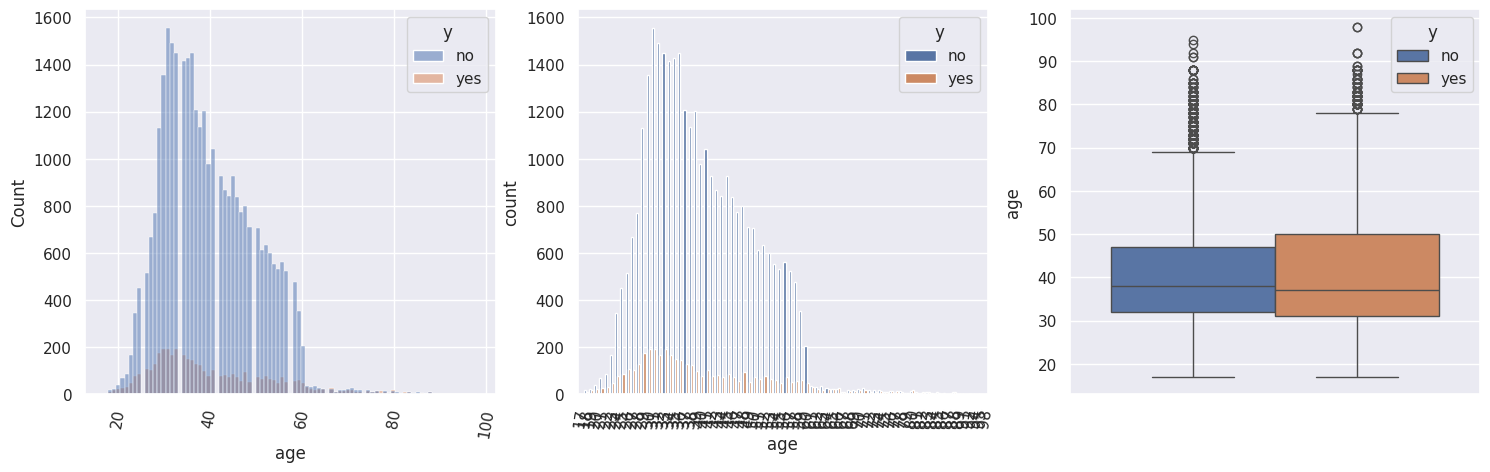

In [7]:
data_inspections('age')

#### Notes

This is a continuous feature.

From the reading, this looks unimodal (skewed right)

#### Data manipulation



Describe
 count           36959
unique              4
top       middle-aged
freq            21280
Name: age_bin, dtype: object


Value Counts
 age_bin
middle-aged    21280
old            14844
very_old         708
young            127
Name: count, dtype: int64


The actual nulls count: 110
This section shows the values for this field that were marked as yes in the Y column 


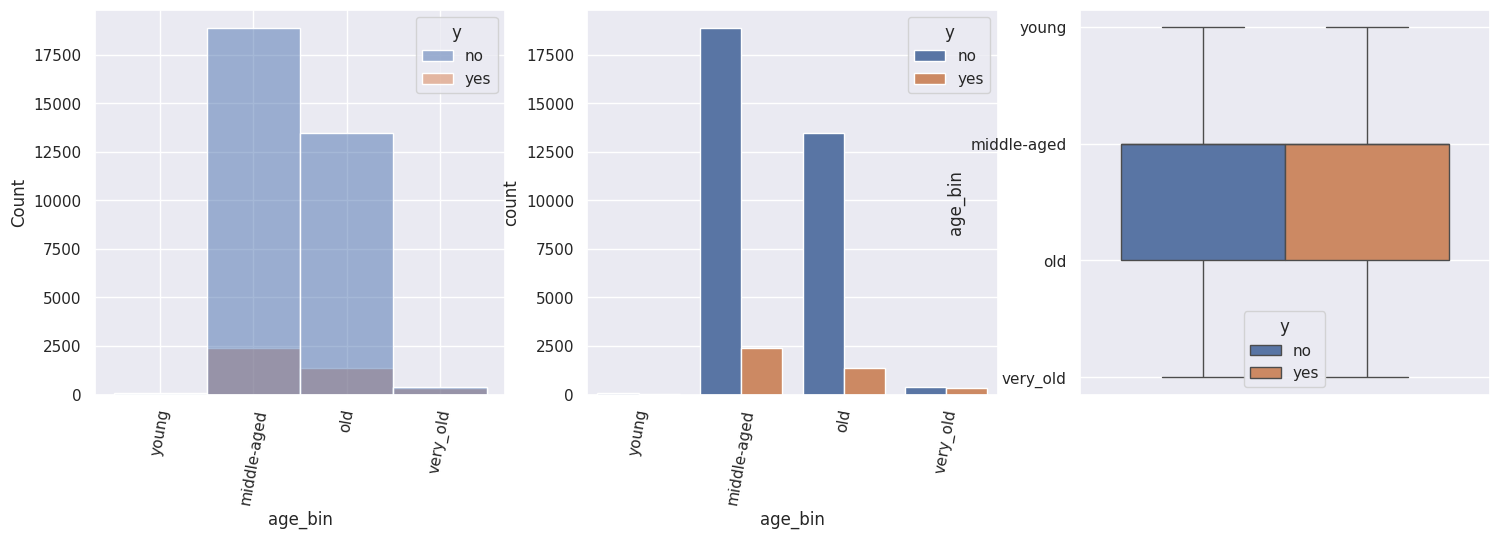

In [8]:
# bin the age and re-graph

age_bins = [0, 20, 40, 60, 80]
age_labels = ['young', 'middle-aged', 'old', 'very_old']
campaign['age_bin'] = pd.cut(campaign['age'], age_bins, labels=age_labels )
data_inspections('age_bin')



### Job




Describe
 count      37069
unique        12
top       admin.
freq        9400
Name: job, dtype: object


Value Counts
 job
admin.           9400
blue-collar      8329
technician       6066
services         3548
management       2648
retired          1534
entrepreneur     1308
self-employed    1274
housemaid         962
unemployed        913
student           793
unknown           294
Name: count, dtype: int64


unknown percent
294 / 37069 
1 %


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
job
admin.           1234
technician        659
blue-collar       568
retired           387
management        303
services          293
student           249
self-employed     137
unemployed        134
entrepreneur      113
housemaid          96
unknown            35
Name: count, dtype: int64


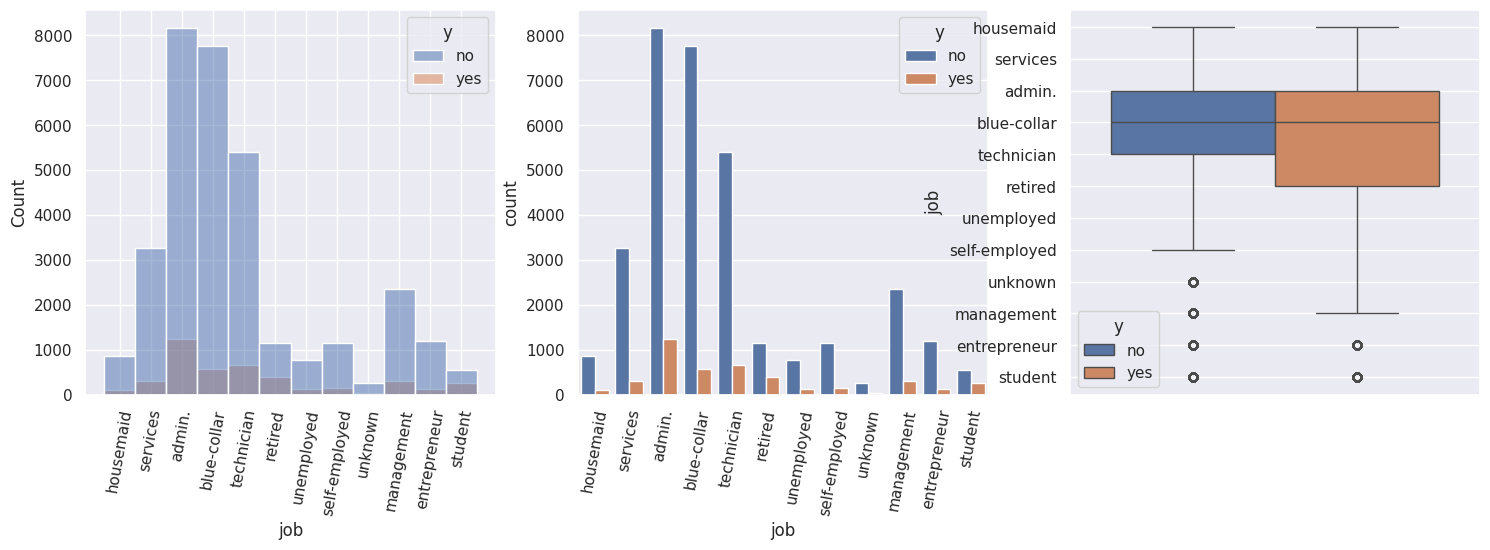

In [9]:
data_inspections('job')

### Marital



Describe
 count       37069
unique          4
top       married
freq        22456
Name: marital, dtype: object


Value Counts
 marital
married     22456
single      10410
divorced     4134
unknown        69
Name: count, dtype: int64


unknown percent
69 / 37069 
0 %


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
marital
married     2295
single      1465
divorced     439
unknown        9
Name: count, dtype: int64


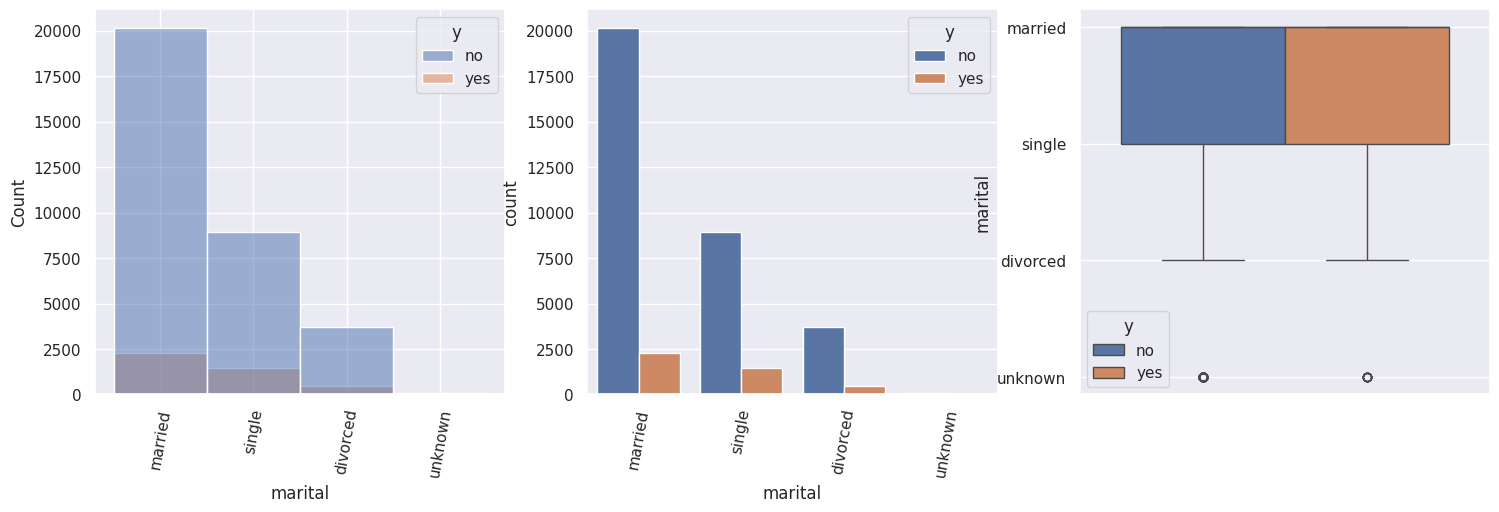

In [10]:
data_inspections('marital')

### Education



Describe
 count                 37069
unique                    8
top       university.degree
freq                  10949
Name: education, dtype: object


Value Counts
 education
university.degree      10949
high.school             8554
basic.9y                5427
professional.course     4742
basic.4y                3764
basic.6y                2082
unknown                 1535
illiterate                16
Name: count, dtype: int64


unknown percent
1535 / 37069 
4 %


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
education
university.degree      1522
high.school             940
professional.course     540
basic.9y                418
basic.4y                386
unknown                 229
basic.6y                169
illiterate                4
Name: count, dtype: int64


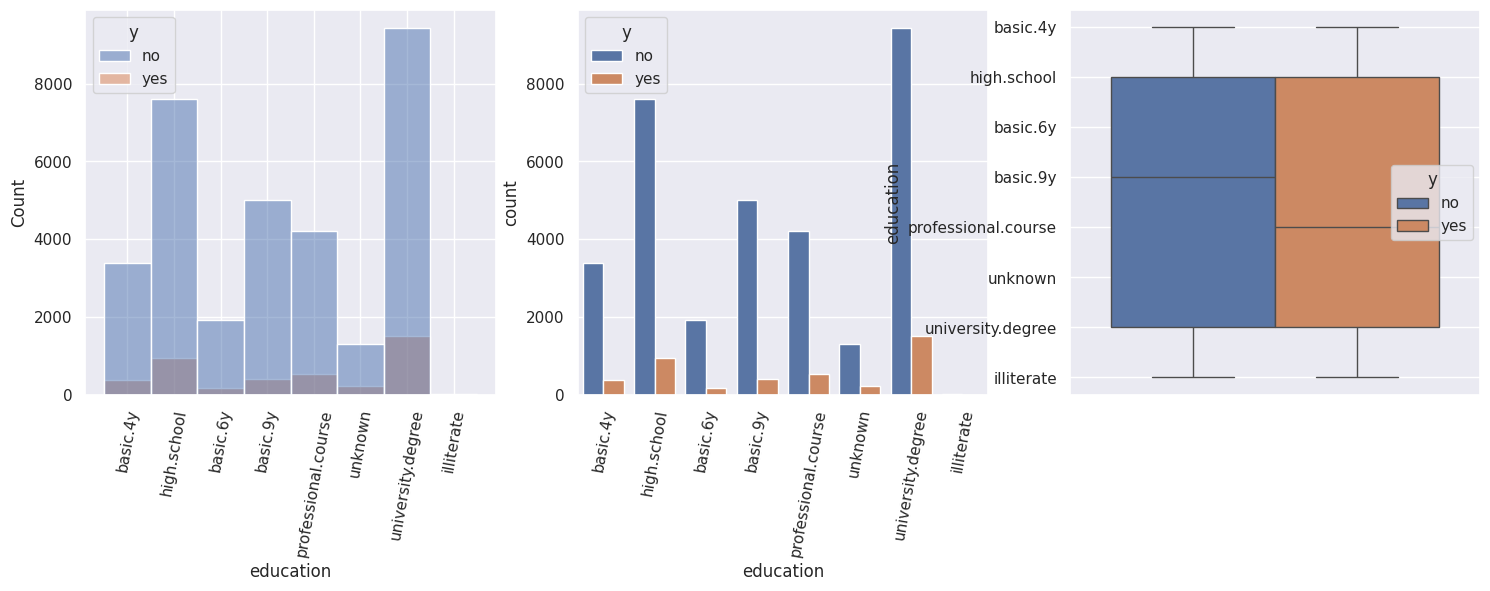

In [11]:
data_inspections('education')

### Default



Describe
 count     37069
unique        3
top          no
freq      29341
Name: default, dtype: object


Value Counts
 default
no         29341
unknown     7725
yes            3
Name: count, dtype: int64


unknown percent
7725 / 37069 
21 %


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
default
no         3806
unknown     402
Name: count, dtype: int64


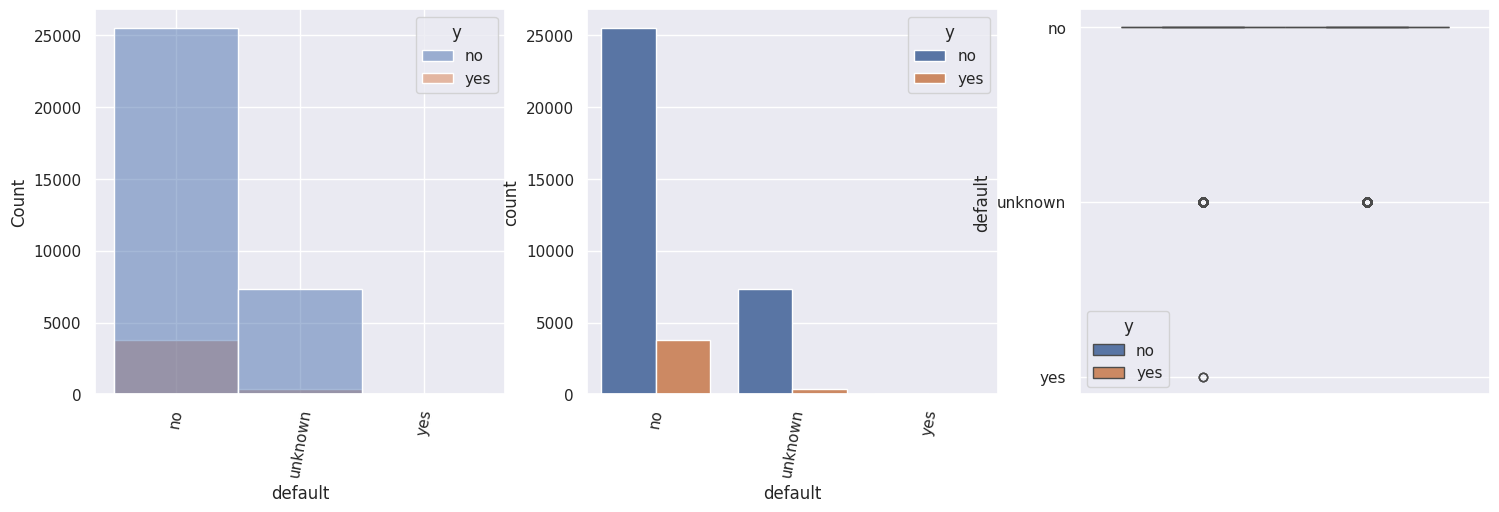

In [12]:
data_inspections("default")

### Housing



Describe
 count     37069
unique        3
top         yes
freq      19474
Name: housing, dtype: object


Value Counts
 housing
yes        19474
no         16701
unknown      894
Name: count, dtype: int64


unknown percent
894 / 37069 
2 %


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
housing
yes        2275
no         1836
unknown      97
Name: count, dtype: int64


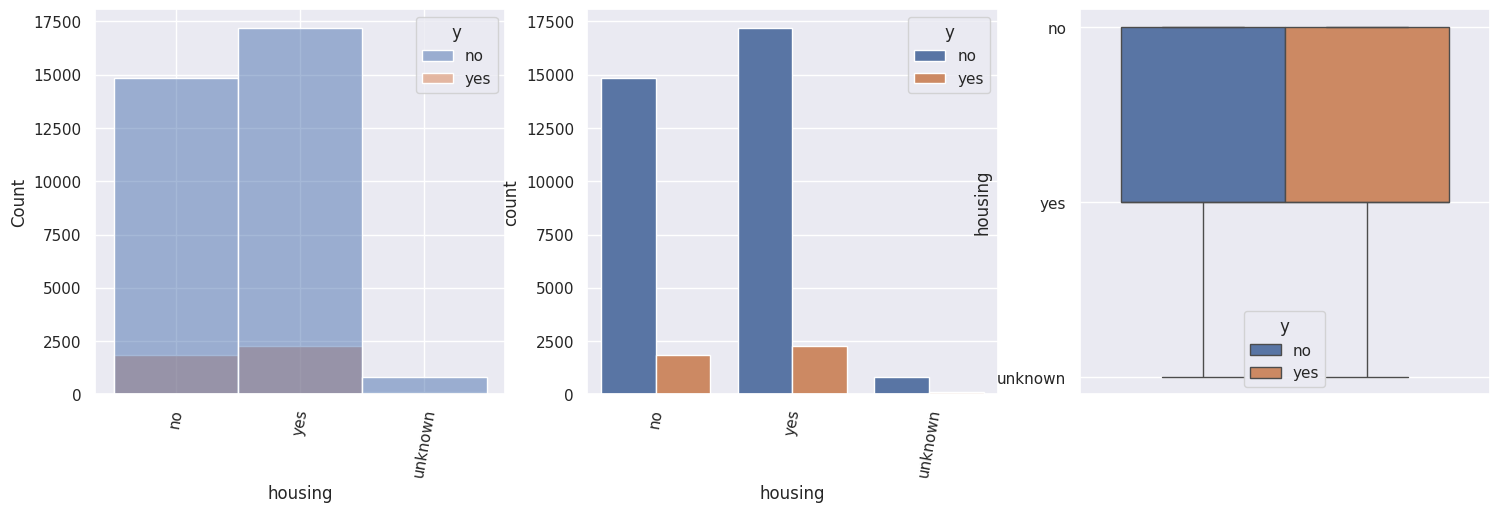

In [13]:
data_inspections("housing")

### Loan



Describe
 count     37069
unique        3
top          no
freq      30590
Name: loan, dtype: object


Value Counts
 loan
no         30590
yes         5585
unknown      894
Name: count, dtype: int64


unknown percent
894 / 37069 
2 %


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
loan
no         3498
yes         613
unknown      97
Name: count, dtype: int64


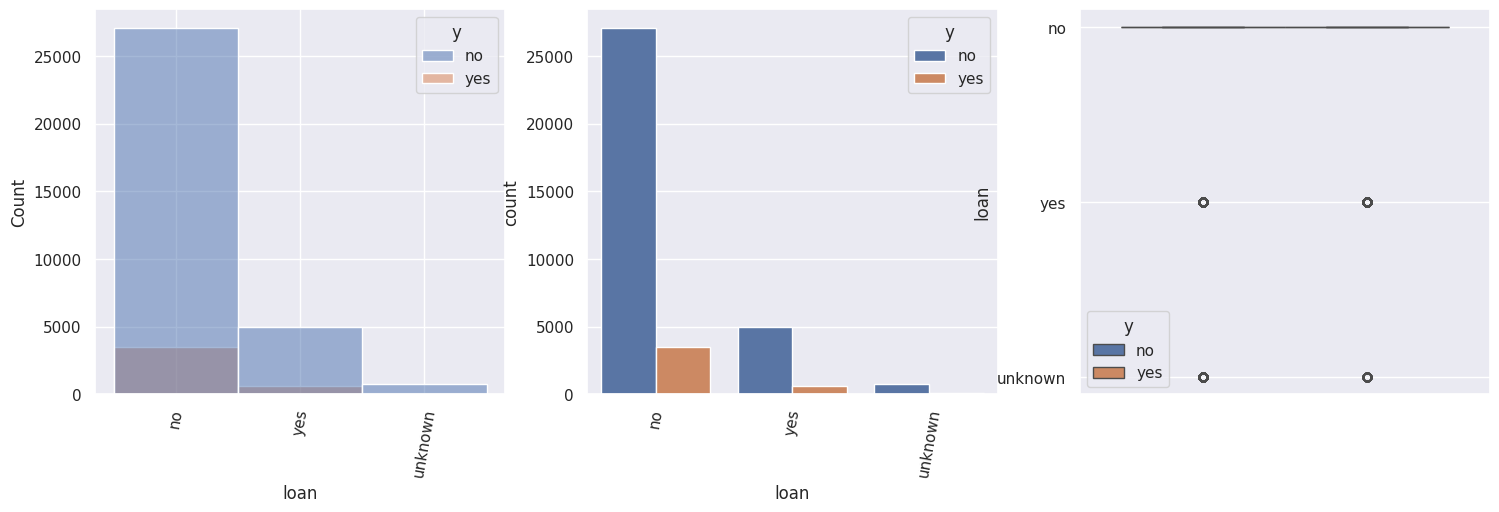

In [14]:
data_inspections("loan")

## Last contact info

### Contact



Describe
 count        37069
unique           2
top       cellular
freq         23515
Name: contact, dtype: object


Value Counts
 contact
cellular     23515
telephone    13554
Name: count, dtype: int64


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
contact
cellular     3496
telephone     712
Name: count, dtype: int64


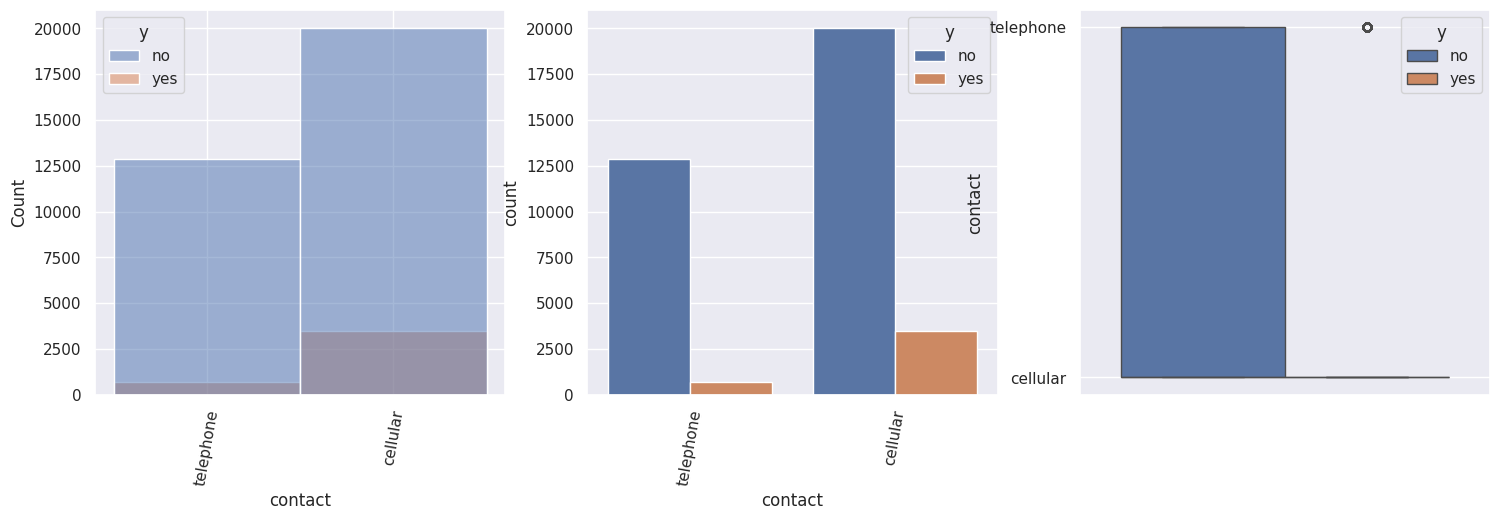

In [15]:
data_inspections("contact")

### month



Describe
 count     37069
unique       10
top         may
freq      12370
Name: month, dtype: object


Value Counts
 month
may    12370
jul     6445
aug     5555
jun     4817
nov     3698
apr     2369
oct      653
sep      508
mar      496
dec      158
Name: count, dtype: int64


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
month
may    800
jul    589
aug    583
jun    502
apr    496
nov    381
oct    291
mar    252
sep    236
dec     78
Name: count, dtype: int64


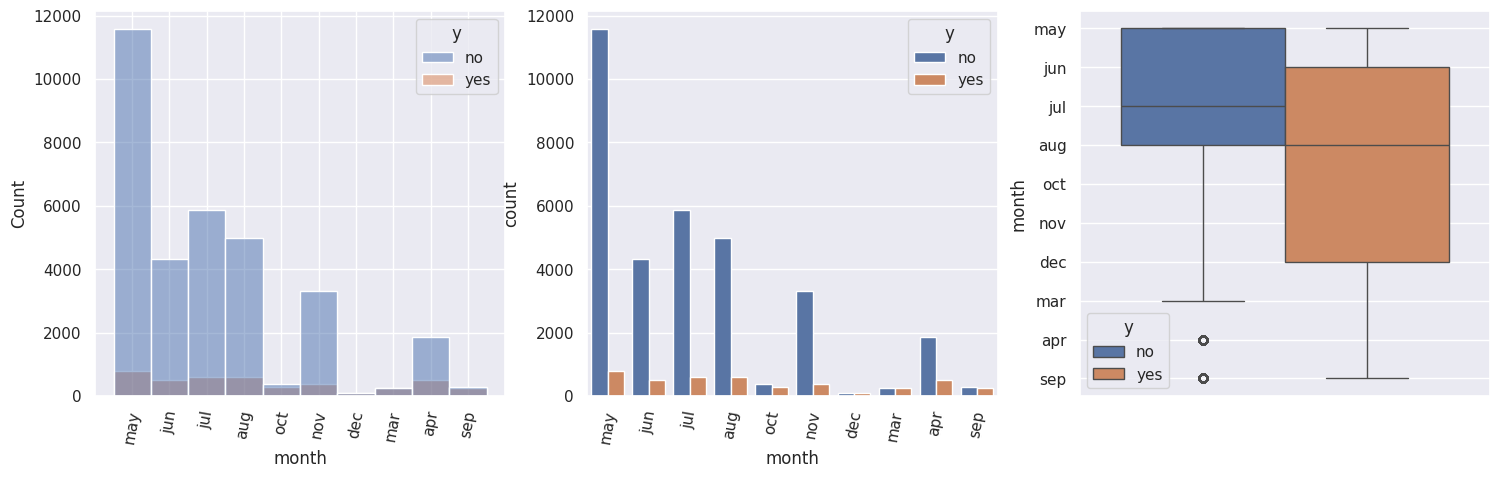

In [16]:
data_inspections("month")

### Day of the week



Describe
 count     37069
unique        5
top         thu
freq       7742
Name: day_of_week, dtype: object


Value Counts
 day_of_week
thu    7742
mon    7657
wed    7347
tue    7287
fri    7036
Name: count, dtype: int64


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
day_of_week
thu    958
wed    865
tue    857
fri    767
mon    761
Name: count, dtype: int64


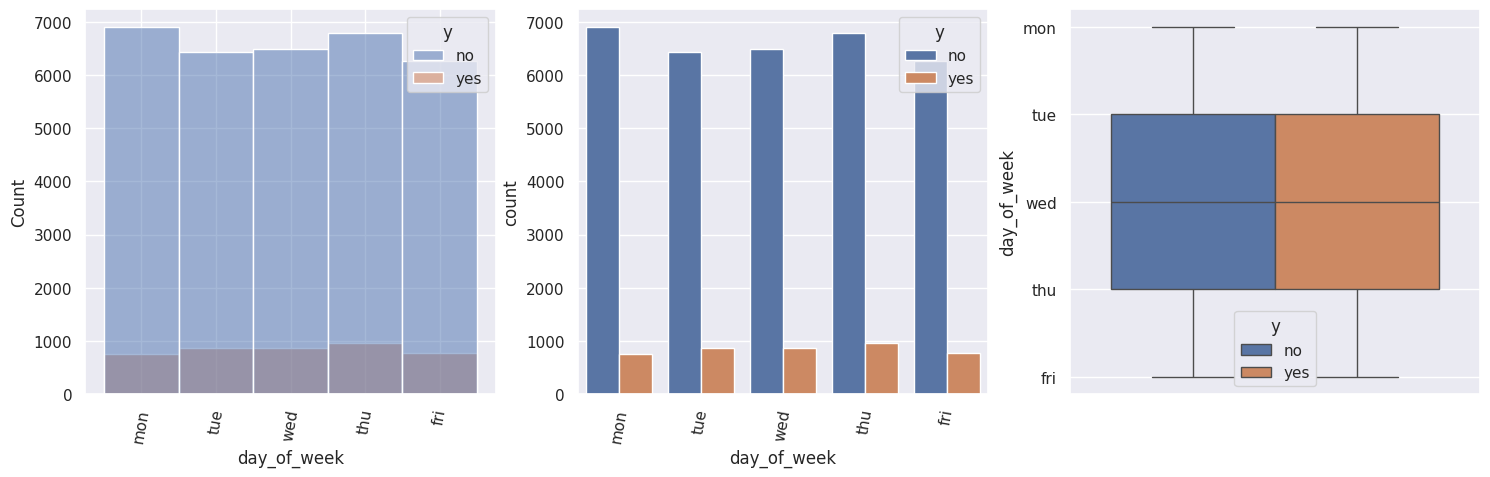

In [17]:
data_inspections('day_of_week')

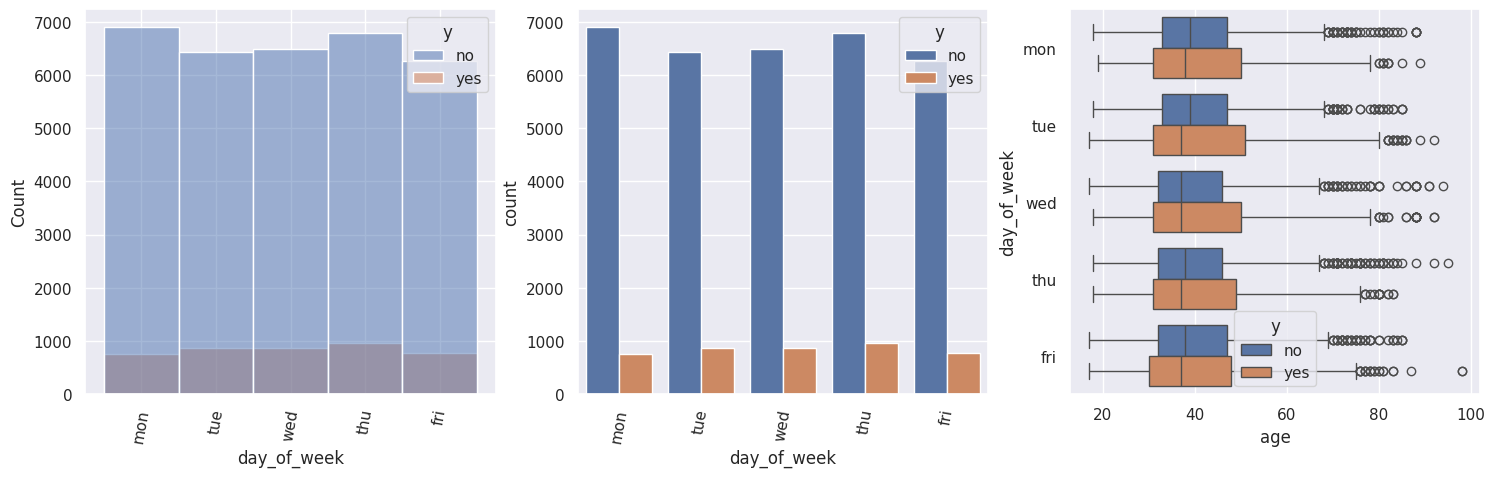

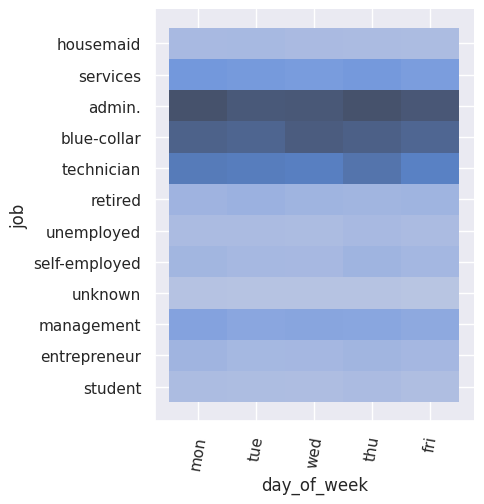

In [18]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.histplot(campaign, x='day_of_week', hue='y', ax=axes[0]).tick_params(axis='x', rotation=80)
sns.countplot(campaign, x='day_of_week', hue='y', ax=axes[1]).tick_params(axis='x', rotation=80)
sns.boxplot(campaign, x='age', y='day_of_week', hue='y', ax=axes[2])
sns.displot(campaign, x='day_of_week', y='job').tick_params(axis='x', rotation=80)

## Other Attributes

### Campaign
campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)



Describe
 count    37069.000000
mean         2.564407
std          2.764084
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


Value Counts
 campaign
1     15874
2      9554
3      4804
4      2378
5      1432
6       855
7       559
8       363
9       265
10      207
11      164
12      112
13       81
14       55
17       50
15       47
16       44
18       30
20       29
19       26
21       21
22       17
23       13
24       13
27       10
29       10
25        7
31        7
30        7
28        7
26        6
35        5
33        4
32        3
40        2
34        2
42        2
39        1
56        1
41        1
37        1
Name: count, dtype: int64


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
campaign
1     2085
2     1088
3      530
4      226
5      109
6       67
7       37
9       17
8       15
10      11
11   

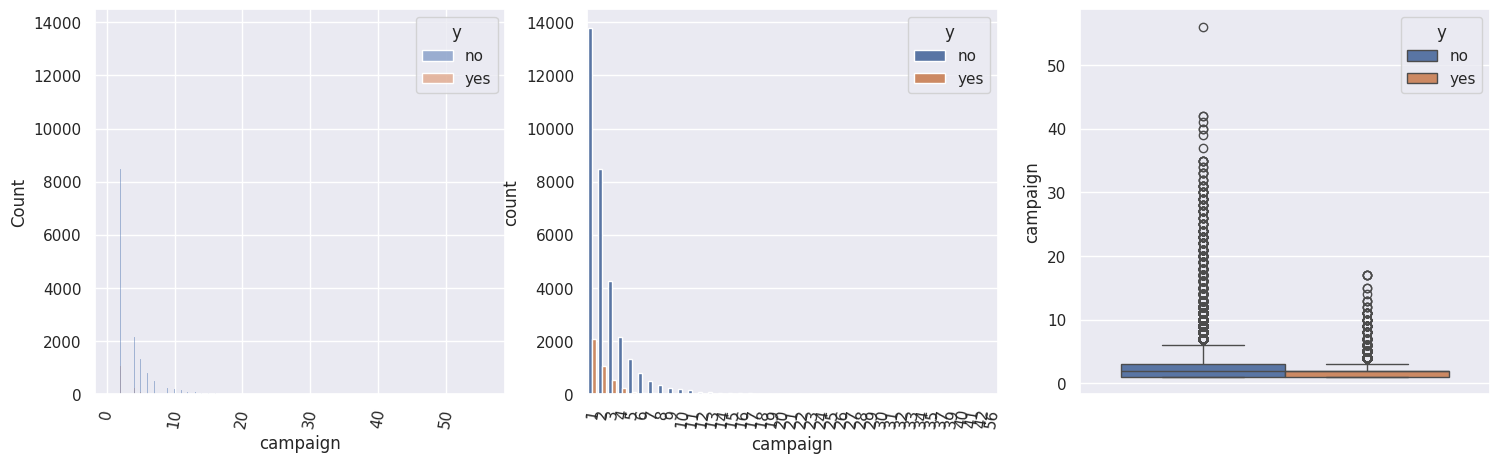

In [19]:
data_inspections('campaign')

### pdays

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)





Describe
 count    37069.000000
mean       962.221803
std        187.531477
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64


Value Counts
 pdays
999    35696
3        396
6        371
4        107
7         56
9         56
12        55
2         54
10        50
5         42
13        32
11        26
1         23
15        22
14        18
8         16
0         14
16        10
17         8
18         6
19         3
21         2
22         2
26         1
25         1
27         1
20         1
Name: count, dtype: int64


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
pdays
999    3322
3       271
6       262
4        57
7        38
2        33
9        32
10       29
5        26
12       25
13       25
11       15
15       14
8        12
14       11
0         9
1         8
16        6
18        4
21        2
17        2
25        1
2

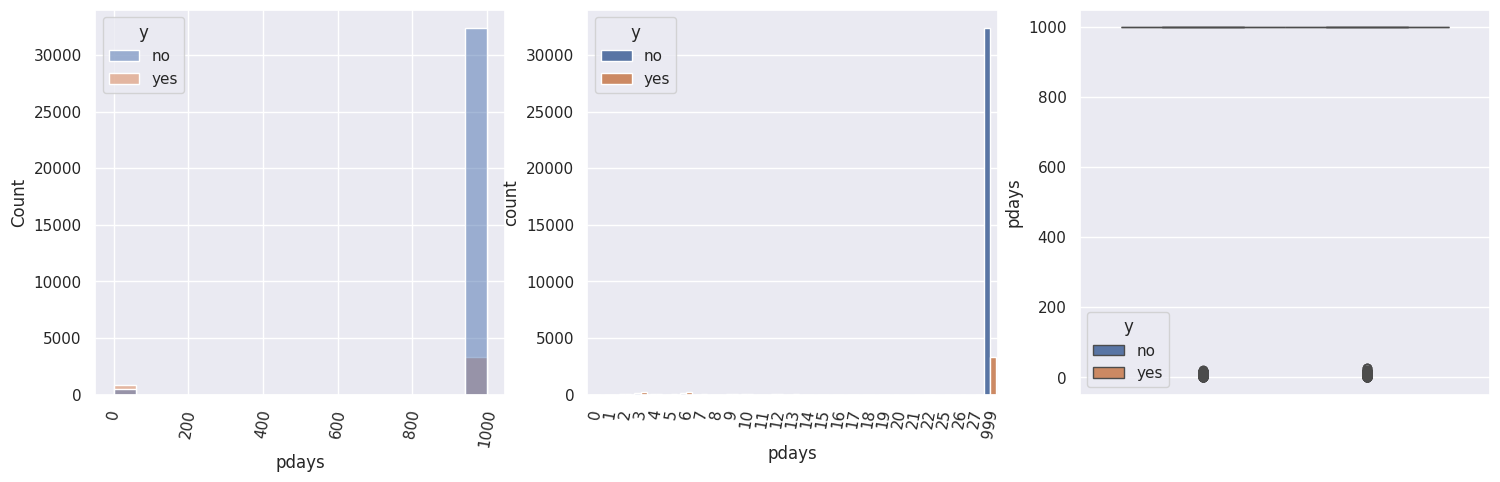

In [20]:
data_inspections('pdays')

#### Notes
Large number of outliers -- 999

Seems skewed, so I think we should drop this.

The below describes what the dataset would look like if we dropped the rows that have 999.

In [21]:
# look at the data without the 999s
pdays = campaign[campaign['pdays'] < 998]
pdays.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,1373.000000,1373.00000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000
mean,42.025492,1.81209,6.042243,1.667881,-2.097232,93.347904,-38.377130,0.984780,5028.857393
std,15.408815,1.20601,3.839866,0.936214,0.833627,0.787635,6.657855,0.528716,52.155730
min,17.000000,1.00000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,30.000000,1.00000,3.000000,1.000000,-2.900000,92.649000,-42.000000,0.719000,4991.600000
50%,37.000000,1.00000,6.000000,1.000000,-1.800000,93.200000,-38.300000,0.879000,5017.500000
75%,52.000000,2.00000,7.000000,2.000000,-1.700000,94.055000,-31.400000,1.044000,5076.200000
max,98.000000,11.00000,27.000000,7.000000,-0.100000,94.767000,-26.900000,4.286000,5195.800000


#### Data Manipulation



Describe
 count             37055
unique                4
top       not_contacted
freq              35696
Name: pdays_bin, dtype: object


Value Counts
 pdays_bin
not_contacted    35696
recent             576
very_recent        473
not_recent         310
Name: count, dtype: int64


The actual nulls count: 14
This section shows the values for this field that were marked as yes in the Y column 


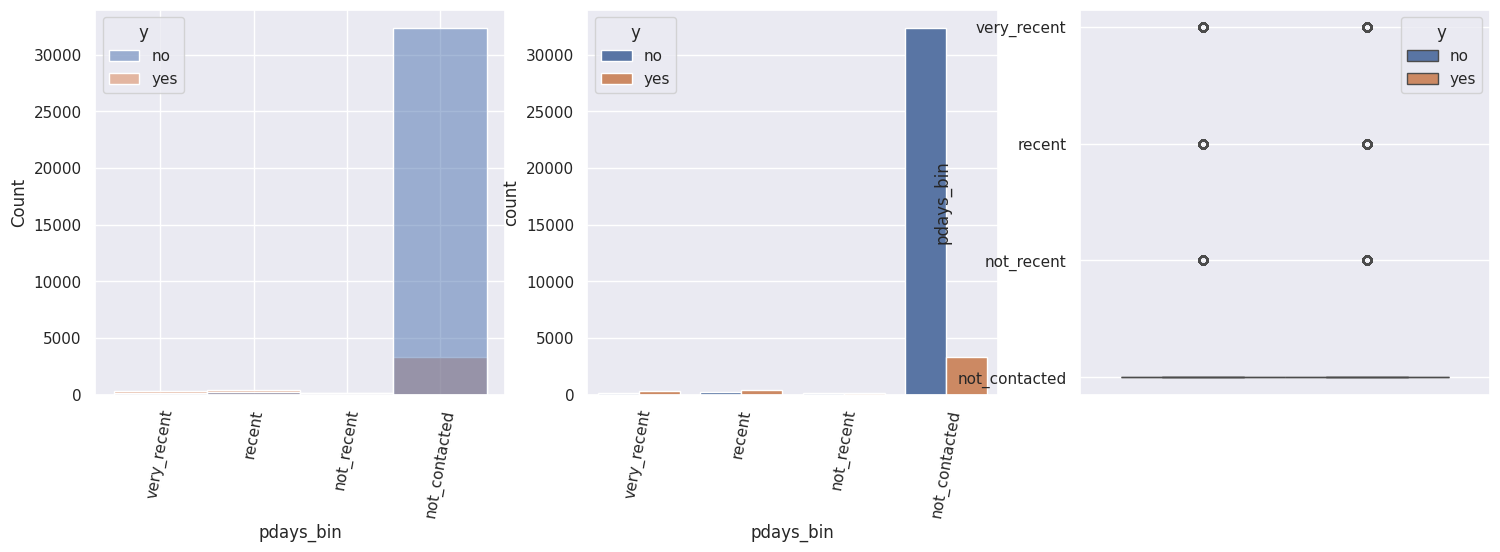

In [22]:
# bin the age and re-graph

pdays_bins = [0, 3, 7, 998, 1000]
pdays_labels = ['very_recent', 'recent', 'not_recent', 'not_contacted']
campaign['pdays_bin'] = pd.cut(campaign['pdays'], pdays_bins, labels=pdays_labels )
data_inspections('pdays_bin')


### previous

previous: number of contacts performed before this campaign and for this client (numeric)



Describe
 count    37069.000000
mean         0.173730
std          0.496159
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64


Value Counts
 previous
0    31988
1     4116
2      684
3      196
4       64
5       15
6        5
7        1
Name: count, dtype: int64


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
previous
0    2843
1     876
2     323
3     116
4      37
5      10
6       3
Name: count, dtype: int64


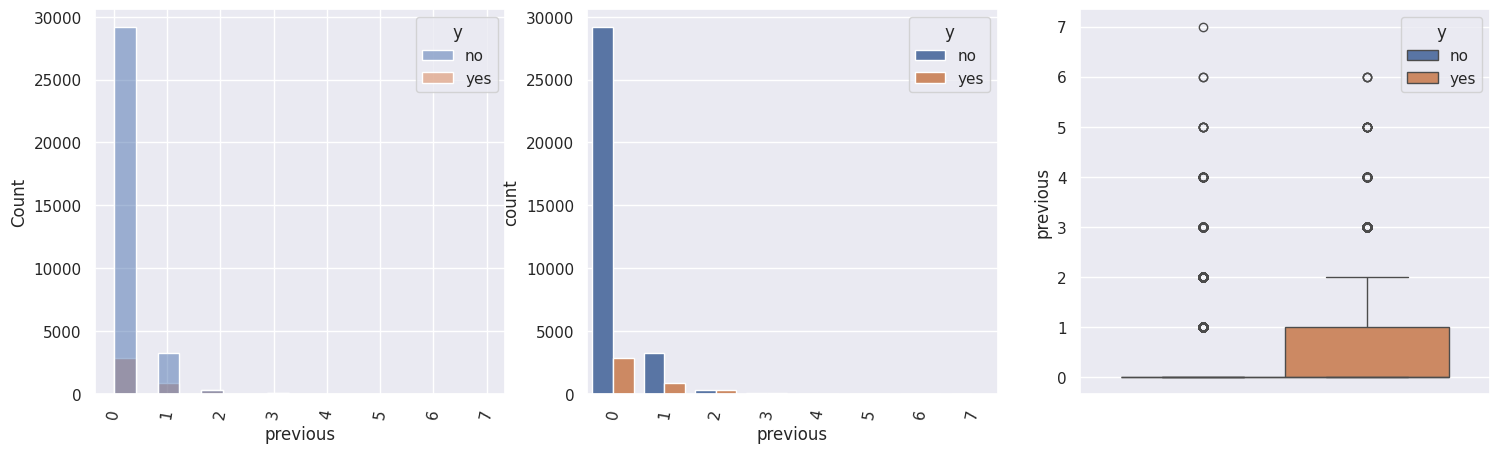

In [23]:
data_inspections('previous')

### poutcome
poutcome - nonexisten is > 60%

We can see that 31988 entries are nonexistent



Describe
 count           37069
unique              3
top       nonexistent
freq            31988
Name: poutcome, dtype: object


Value Counts
 poutcome
nonexistent    31988
failure         3843
success         1238
Name: count, dtype: int64


nonexistent percent
31988 / 37069 
86 %


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
poutcome
nonexistent    2843
success         814
failure         551
Name: count, dtype: int64


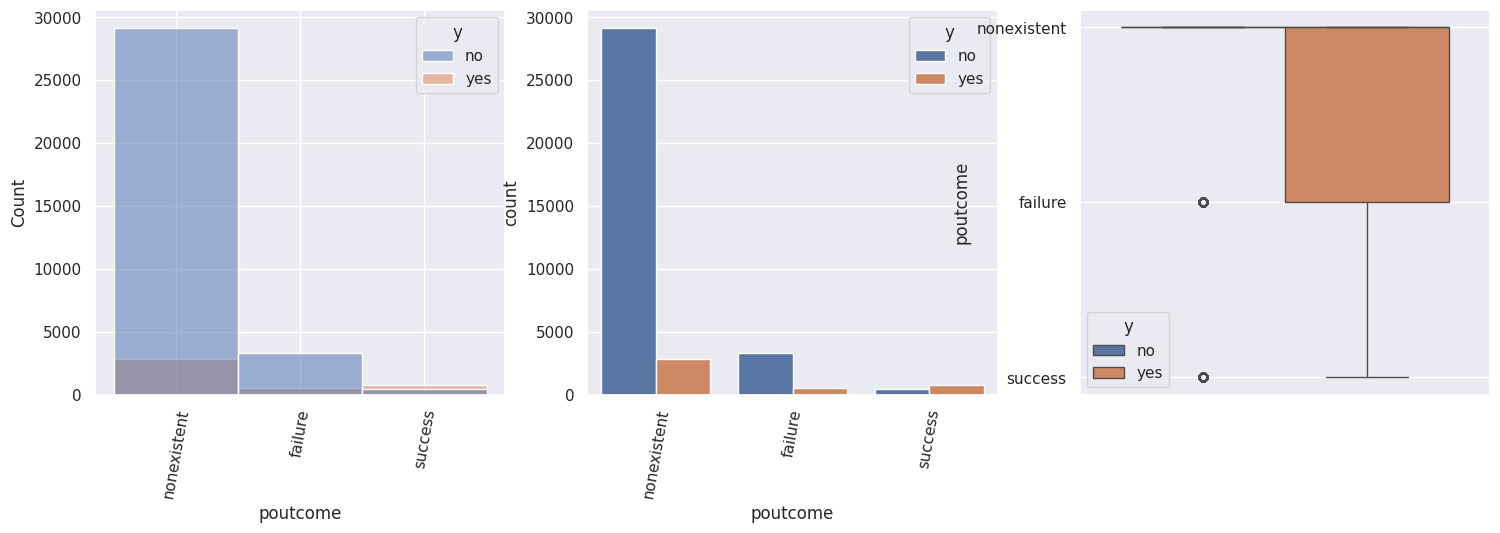

In [24]:
data_inspections('poutcome')

#### Notes

Large number of missing values > 60%

## Social and Economic Context Attribs

In [25]:
# scale data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
features_to_be_scaled = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
to_be_scaled = campaign[features_to_be_scaled].copy()
campaign.drop(columns=features_to_be_scaled)
scaler = StandardScaler()
scaler.fit(to_be_scaled)
scaled_features = scaler.transform(to_be_scaled)
scaled_df = pd.DataFrame(scaled_features, columns=features_to_be_scaled, index=campaign.index)
print(scaled_df.head(200))
pd.merge(campaign, scaled_df)
print(campaign.head())


     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0        0.647774        0.720571       0.884635   0.712064     0.331833
1        0.647774        0.720571       0.884635   0.712064     0.331833
2        0.647774        0.720571       0.884635   0.712064     0.331833
3        0.647774        0.720571       0.884635   0.712064     0.331833
4        0.647774        0.720571       0.884635   0.712064     0.331833
..            ...             ...            ...        ...          ...
195      0.647774        0.720571       0.884635   0.712064     0.331833
196      0.647774        0.720571       0.884635   0.712064     0.331833
197      0.647774        0.720571       0.884635   0.712064     0.331833
198      0.647774        0.720571       0.884635   0.712064     0.331833
199      0.647774        0.720571       0.884635   0.712064     0.331833

[200 rows x 5 columns]
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  marri

### emp.var.rate



Describe
 count    37069.000000
mean         0.081526
std          1.572287
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64


Value Counts
 emp.var.rate
 1.4    14605
-1.8     8234
 1.1     7001
-0.1     3314
-2.9     1520
-3.4      973
-1.7      692
-1.1      572
-3.0      150
-0.2        8
Name: count, dtype: int64


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
emp.var.rate
-1.8    1340
 1.4     783
-2.9     527
-3.4     419
-1.7     364
-1.1     277
-0.1     212
 1.1     208
-3.0      78
Name: count, dtype: int64


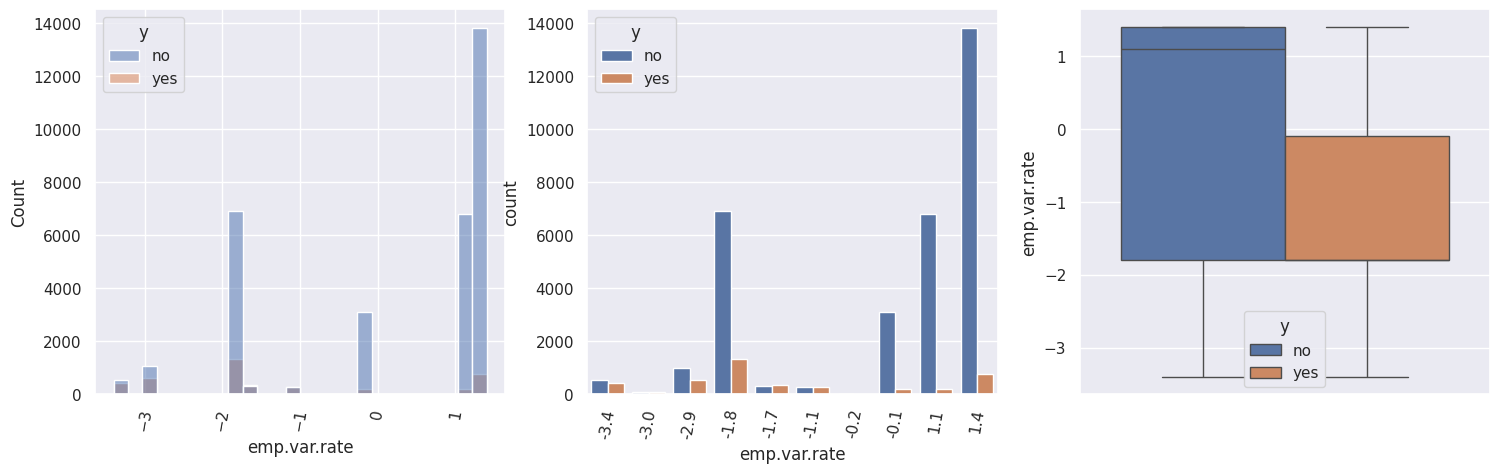

In [26]:
data_inspections("emp.var.rate")

### cons.price.idx



Describe
 count    37069.000000
mean        93.576551
std          0.579339
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64


Value Counts
 cons.price.idx
93.994    7001
93.918    6000
92.893    5171
93.444    4647
94.465    3958
93.200    3250
93.075    2213
92.201     696
92.963     661
92.431     400
92.649     332
94.215     282
94.199     267
92.843     256
92.379     241
93.369     240
94.027     212
93.876     198
94.055     198
94.601     189
92.469     163
93.749     156
92.713     150
94.767     116
93.798      64
92.756       8
Name: count, dtype: int64


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
cons.price.idx
92.893    476
93.075    408
93.918    371
93.444    242
92.963    239
92.201    229
93.994    208
93.200    170
94.465    170
92.431    162
94.215    159
92.649    156
93.369    140
94.199    135
93.

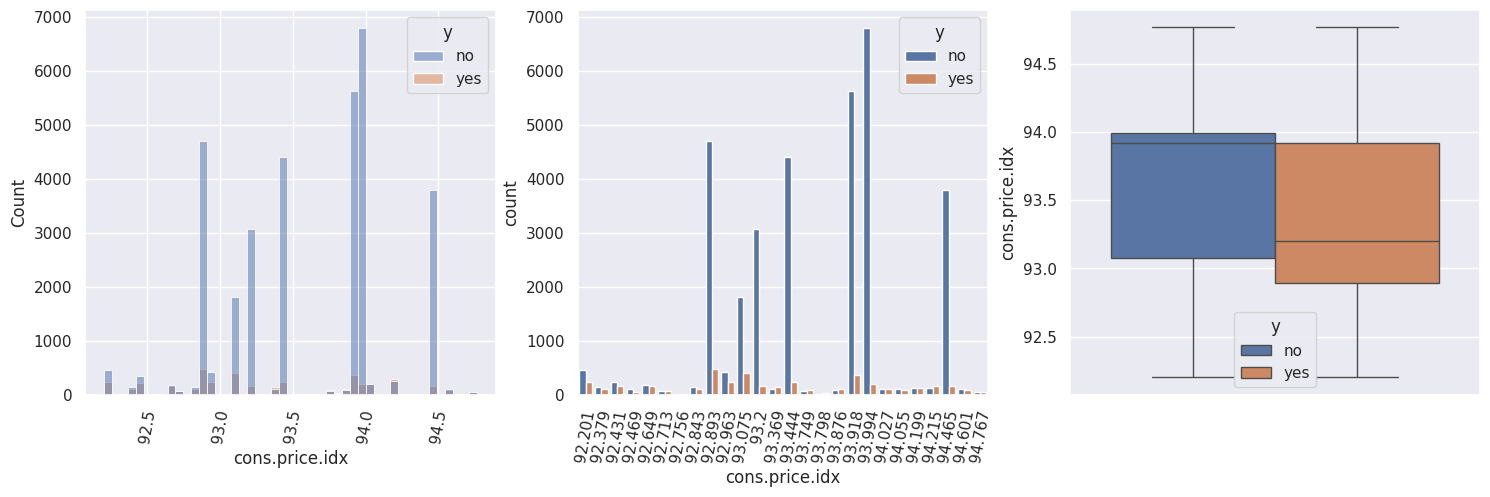

In [27]:
data_inspections("cons.price.idx")

### cons.conf.idx



Describe
 count    37069.000000
mean       -40.494829
std          4.628895
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64


Value Counts
 cons.conf.idx
-36.4    7001
-42.7    6000
-46.2    5171
-36.1    4647
-41.8    3958
-42.0    3250
-47.1    2213
-31.4     696
-40.8     661
-26.9     400
-30.1     332
-40.3     282
-37.5     267
-50.0     256
-29.8     241
-34.8     240
-38.3     212
-40.0     198
-39.8     198
-49.5     189
-33.6     163
-34.6     156
-33.0     150
-50.8     116
-40.4      64
-45.9       8
Name: count, dtype: int64


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
cons.conf.idx
-46.2    476
-47.1    408
-42.7    371
-36.1    242
-40.8    239
-31.4    229
-36.4    208
-42.0    170
-41.8    170
-26.9    162
-40.3    159
-30.1    156
-34.8    140
-37.5    135
-40.0    116
-38.3    112
-50.0    112
-29.8  

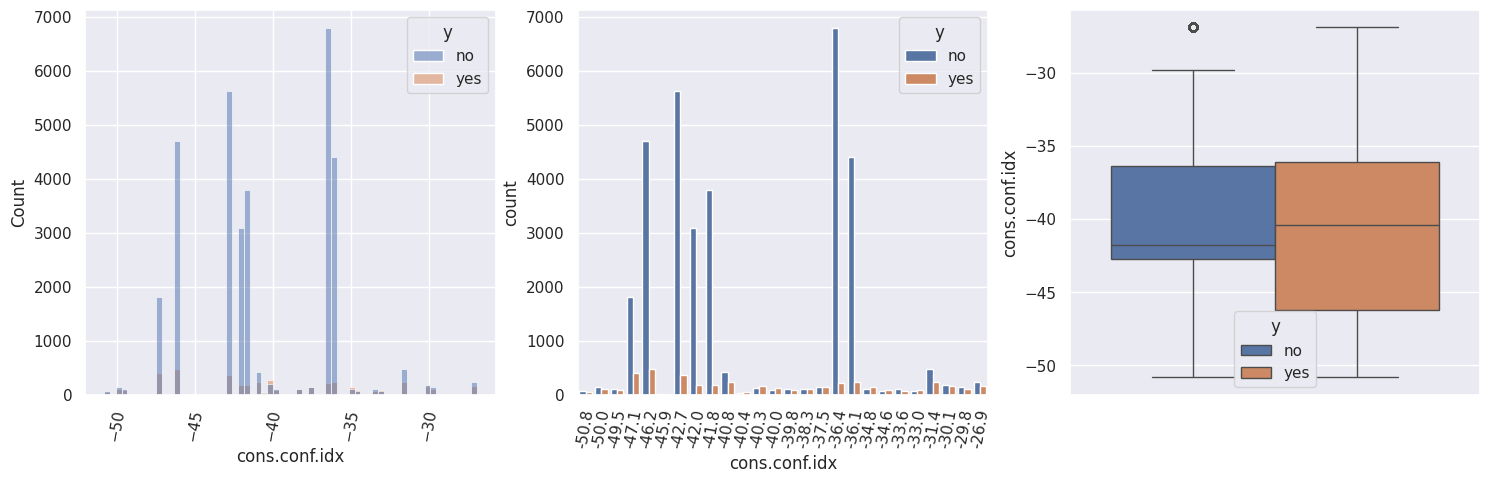

In [28]:
data_inspections("cons.conf.idx")

### euribor3m



Describe
 count    37069.000000
mean         3.621945
std          1.734496
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64


Value Counts
 euribor3m
4.857    2578
4.962    2346
4.963    2222
4.961    1728
4.856    1103
         ... 
3.488       1
3.743       1
3.816       1
0.956       1
0.953       1
Name: count, Length: 314, dtype: int64


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
euribor3m
4.962    130
1.365    127
1.405    125
4.963    113
1.266     93
        ... 
0.752      1
0.793      1
0.713      1
0.711      1
0.895      1
Name: count, Length: 285, dtype: int64


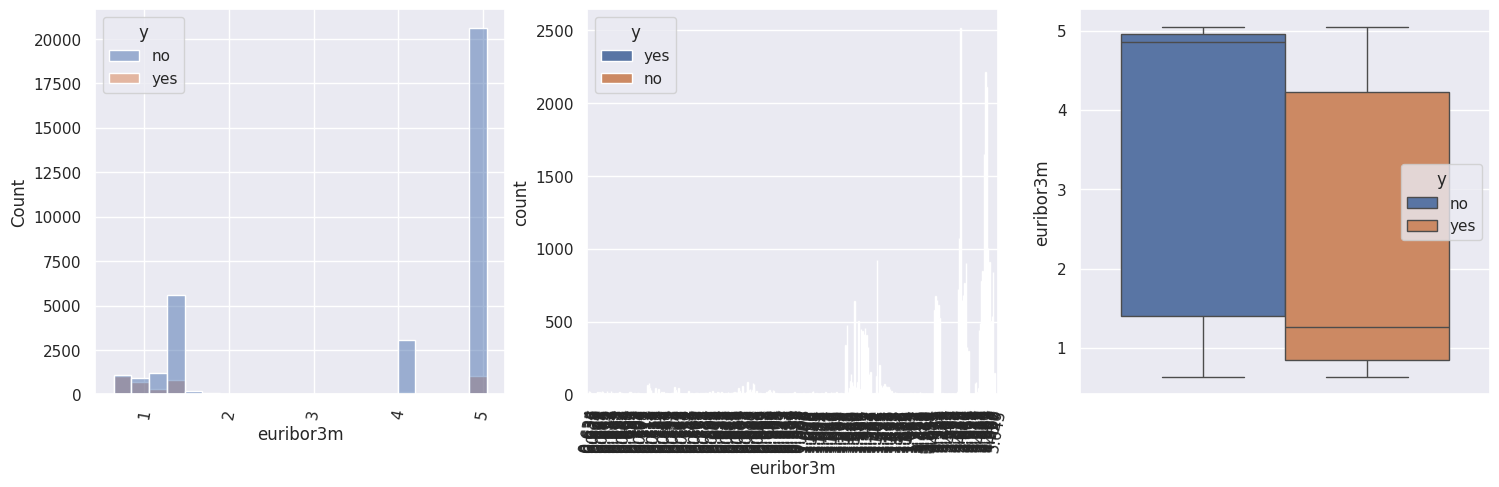

In [29]:
data_inspections("euribor3m")

### nr.employed



Describe
 count    37069.000000
mean      5167.010650
std         72.294476
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64


Value Counts
 nr.employed
5228.1    14605
5099.1     7640
5191.0     7001
5195.8     3314
5076.2     1520
5017.5      973
4991.6      692
5008.7      594
4963.6      572
5023.5      150
5176.3        8
Name: count, dtype: int64


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
nr.employed
5099.1    996
5228.1    783
5076.2    527
5017.5    419
4991.6    364
5008.7    344
4963.6    277
5195.8    212
5191.0    208
5023.5     78
Name: count, dtype: int64


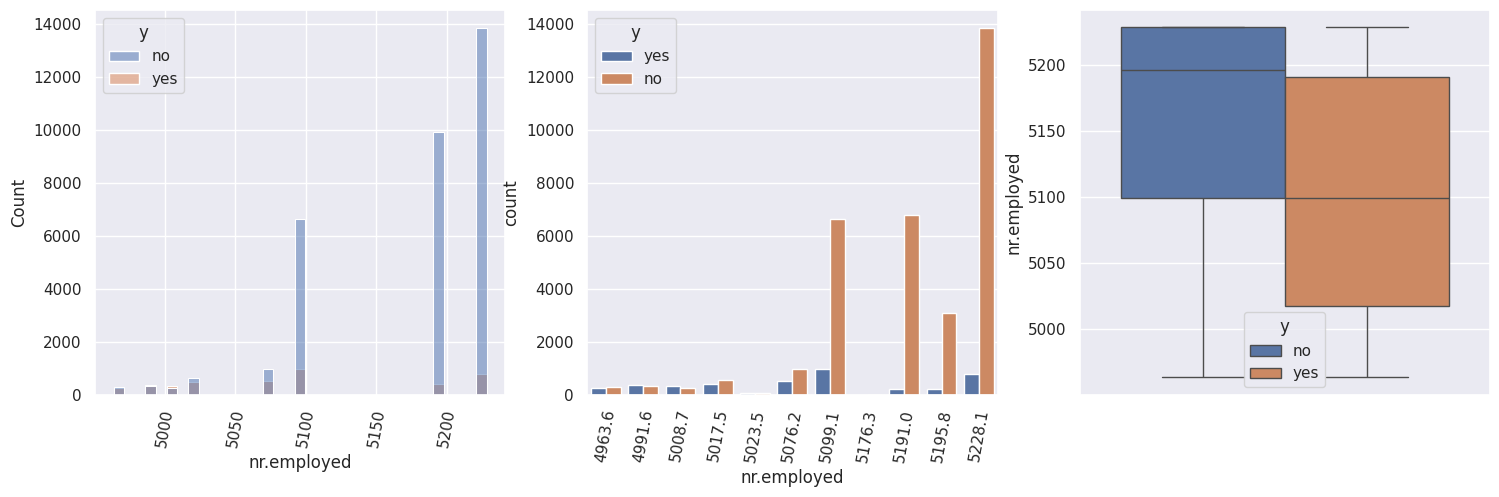

In [30]:
data_inspections('nr.employed')

## Output Variable

### "Y" field



Describe
 count     37069
unique        2
top          no
freq      32861
Name: y, dtype: object


Value Counts
 y
no     32861
yes     4208
Name: count, dtype: int64


The actual nulls count: 0
This section shows the values for this field that were marked as yes in the Y column 
y
yes    4208
Name: count, dtype: int64


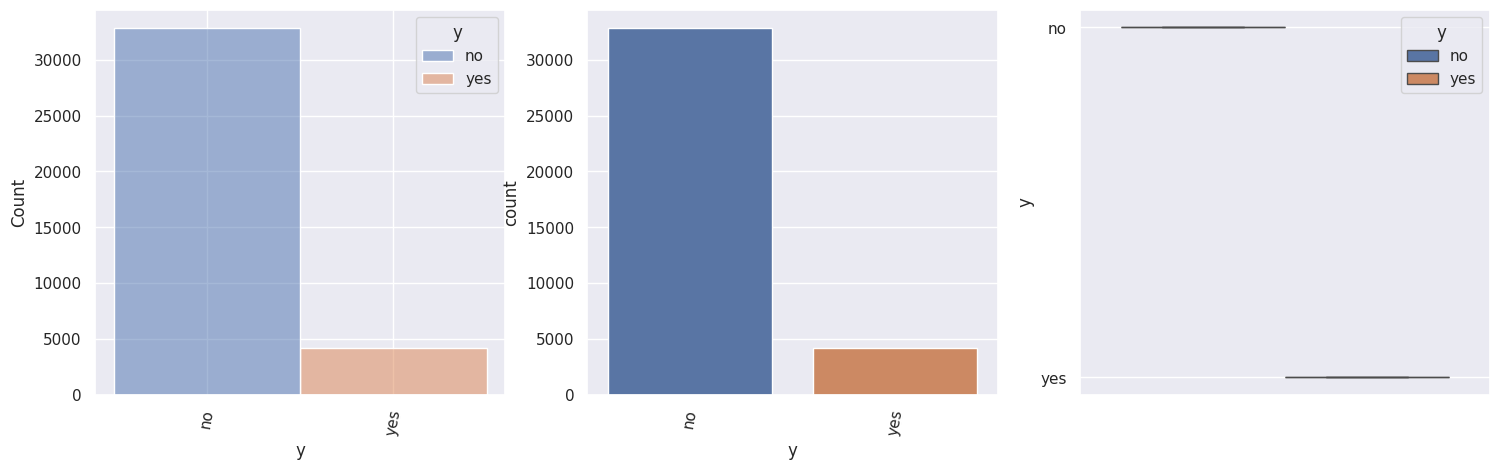

In [31]:
data_inspections('y')

# Required data manipulation

In [32]:
value_map = {
    'yes': 1,
    'no': 0
}
campaign['y_encoded'] = campaign['y'].map(value_map)
